In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import scipy.stats as stats
import joblib

In [2]:
# Load the dataset
df = pd.read_csv('./dataset/test3.csv')
df_original = df.copy()

In [3]:
# Keeping the Item_ID for later use
item_ids = df['Item_ID'].values

In [4]:
# One-hot encoding
categorical_cols = ['Item_Name', 'Category', 'Weather']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [5]:
# The target variable is the actual sales values
y = df['Predicted_sales'].values
df.drop(columns=['Item_ID', 'Date', 'Predicted_sales'], inplace=True)

In [6]:
X = df.values

In [7]:
# Scaling the features
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

In [8]:
# Scaling the target
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [9]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=0)
gbr.fit(X_train, y_train.ravel())

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=500,
                          random_state=0)

In [11]:
joblib.dump(gbr, "./models/gbr_model.pkl")
joblib.dump(scaler_X, "./models/scaler_X.pkl")
joblib.dump(scaler_y, "./models/scaler_y.pkl")

['./models/scaler_y.pkl']

In [12]:
# Predict on validation set for Gradient Boosting Regressor
y_val_pred_gbr = gbr.predict(X_val)


In [13]:
# Calculate evaluation metrics for Gradient Boosting Regressor
mae_gbr = mean_absolute_error(y_val, y_val_pred_gbr)
mse_gbr = mean_squared_error(y_val, y_val_pred_gbr)
r2_gbr = r2_score(y_val, y_val_pred_gbr)


In [14]:
print("Gradient Boosting Regressor Metrics:")
print("Mean Absolute Error (MAE):", mae_gbr)
print("Mean Squared Error (MSE):", mse_gbr)
print("R^2 Score:", r2_gbr)

Gradient Boosting Regressor Metrics:
Mean Absolute Error (MAE): 0.012108074035073677
Mean Squared Error (MSE): 0.00022233553955340328
R^2 Score: 0.9811216638811588


In [15]:
# Define a threshold (e.g., 5%)
threshold = 0.05

# Calculate the number of predictions within the threshold
within_threshold = np.sum(np.abs(y_val - y_val_pred_gbr.reshape(-1, 1)) <= threshold * y_val)

# Calculate the accuracy-like metric
accuracy_like_metric = within_threshold / len(y_val)

print("Accuracy-like Metric (within 5% threshold):", accuracy_like_metric)


Accuracy-like Metric (within 5% threshold): 0.9866666666666667


In [16]:
def plot_predictions_vs_actual(y_true, y_pred):
    plt.figure(figsize=(12, 5))

    # Actual vs Predicted Sales
    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title('Actual vs. Predicted Sales')

    # Residuals vs Predicted Values
    residuals = y_true.ravel() - y_pred
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.hlines(0, min(y_pred), max(y_pred), colors='k', linestyles='--')
    plt.xlabel('Predicted Sales')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Predicted Sales')

    plt.tight_layout()
    plt.show()

In [17]:
def plot_accuracy_over_thresholds(y_true, y_pred):
    thresholds = np.linspace(0, 0.5, 50)  # Varying thresholds from 0 to 50%
    accuracies = []

    for threshold in thresholds:
        within_threshold = np.sum(np.abs(y_true - y_pred.reshape(-1, 1)) <= threshold * y_true)
        accuracy = within_threshold / len(y_true)
        accuracies.append(accuracy)

    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, accuracies, marker='o')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy-like Metric')
    plt.title('Model Accuracy-like Metric over Varying Thresholds')
    plt.grid(True)
    plt.show()

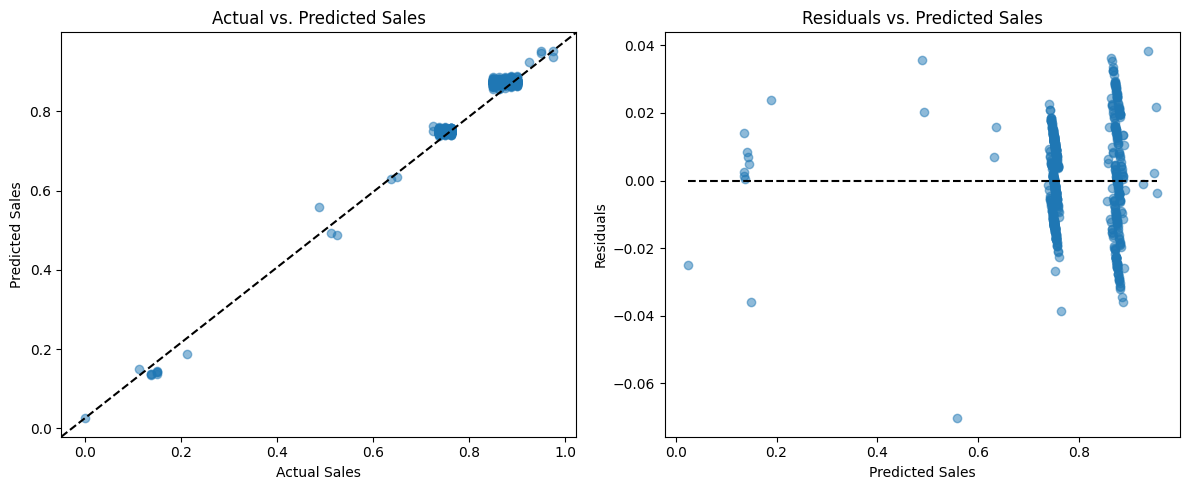

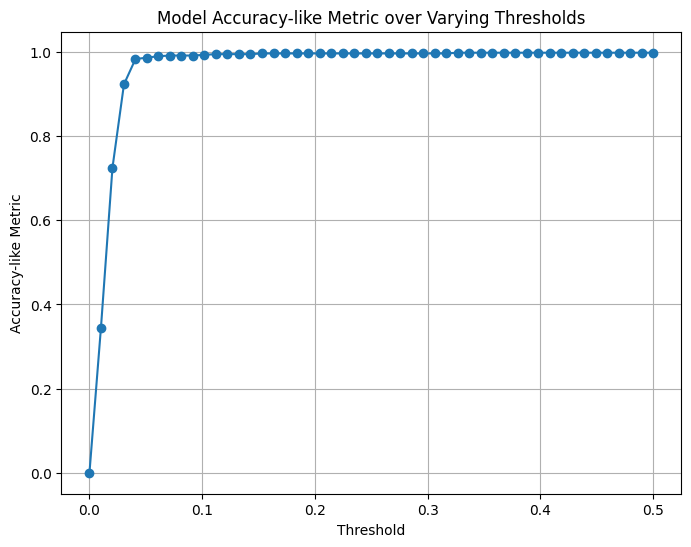

In [18]:
plot_predictions_vs_actual(y_val, y_val_pred_gbr)
plot_accuracy_over_thresholds(y_val, y_val_pred_gbr)

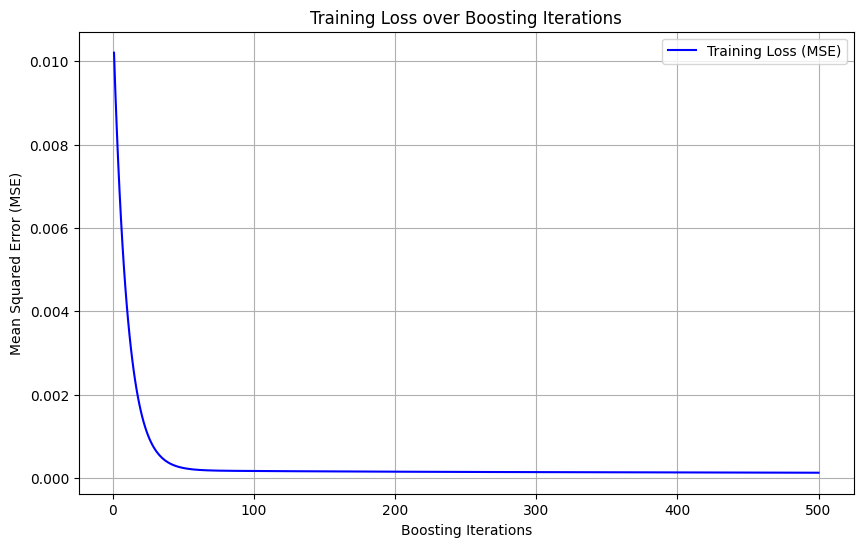

In [19]:
# Calculate training loss (Mean Squared Error) over each boosting iteration
train_loss = [mean_squared_error(y_train, y_pred) for y_pred in gbr.staged_predict(X_train)]
iterations = np.arange(len(train_loss)) + 1

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_loss, '-b', label='Training Loss (MSE)')
plt.xlabel('Boosting Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Loss over Boosting Iterations')
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Actual vs. Predicted Sales')

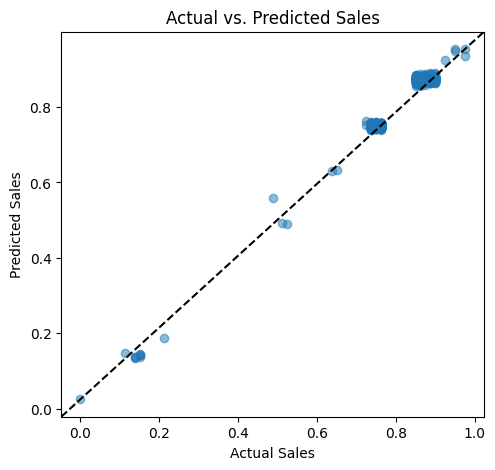

In [20]:
# 1. Scatter Plot (Actual vs. Predicted)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred_gbr, alpha=0.5)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')

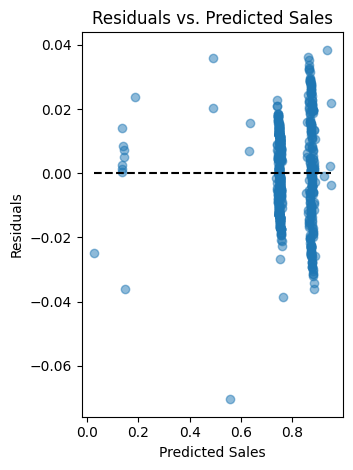

In [21]:
# 2. Residuals Plot
residuals = y_val.ravel() - y_val_pred_gbr
plt.subplot(1, 2, 2)
plt.scatter(y_val_pred_gbr, residuals, alpha=0.5)
plt.hlines(0, min(y_val_pred_gbr), max(y_val_pred_gbr), colors='k', linestyles='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Sales')
plt.tight_layout()
plt.show()

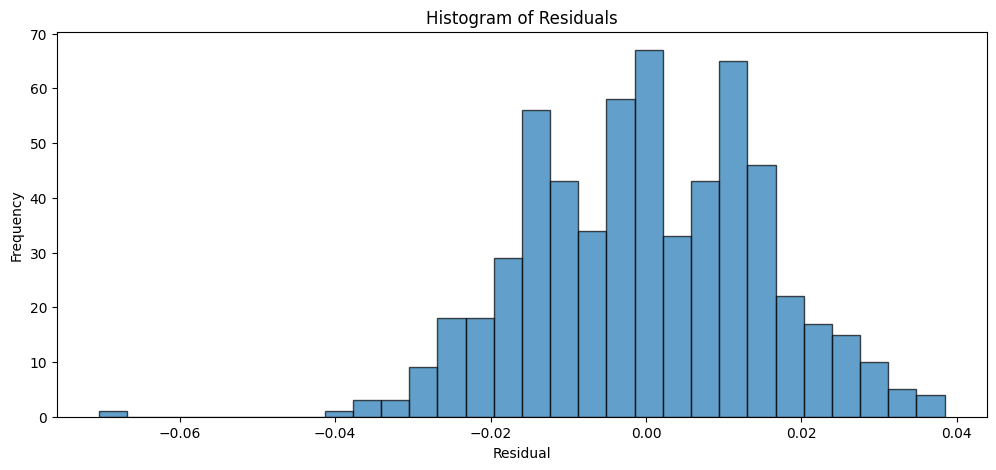

In [22]:
# 3. Histogram of Residuals
plt.figure(figsize=(12, 5))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

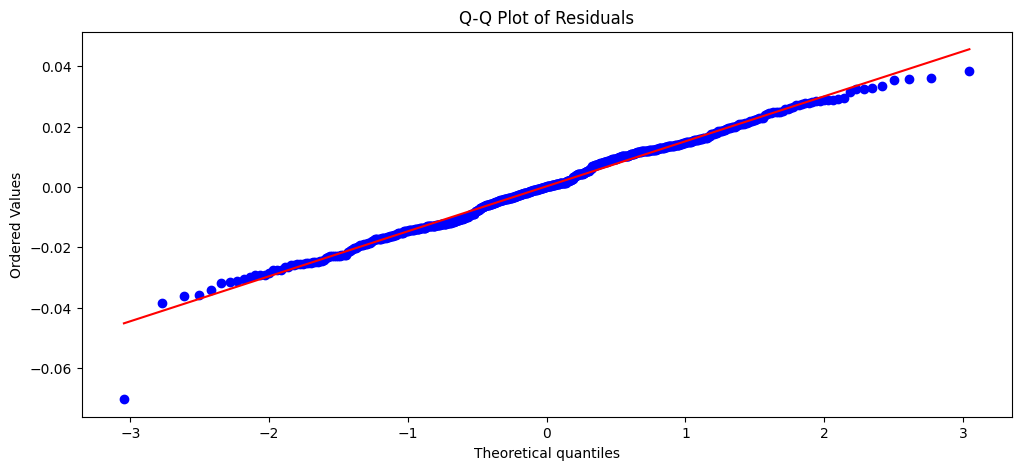

In [23]:
plt.figure(figsize=(12, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [24]:
def predict_sales_for_item_gbr(item_no,avail):
    # Load the saved model and scalers
    loaded_gbr = joblib.load("./models/gbr_model.pkl")
    loaded_scaler_X = joblib.load("./models/scaler_X.pkl")
    loaded_scaler_y = joblib.load("./models/scaler_y.pkl")
    
    if item_no not in item_ids:
        return f"Item number {item_no} does not exist."
    
    item_name = df_original[df_original['Item_ID'] == item_no]['Item_Name'].iloc[0]
    item_idx = list(item_ids).index(item_no)
    latest_data = X[item_idx].reshape(1, -1)
    predicted_sales_scaled = loaded_gbr.predict(latest_data)
    predicted_sales = loaded_scaler_y.inverse_transform(predicted_sales_scaled.reshape(-1, 1))[0][0]
    sales = predicted_sales-avail
    return f"Predicted future sales for item {item_no} (Item Name: {item_name}): {predicted_sales:.2f} The Quantity to Increase/Decrease is {sales}"


In [25]:
print(predict_sales_for_item_gbr(int(input("Enter the item ID")),input("enter the available amount")))

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U2')) -> None